In [322]:
import math
import pandas as pd
import scipy
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

### 9.3 - Linear combinations
In an experiment with t=4 populations means, consider the four linear combinations of
those means.

        l1 = m1 - 3m2 + m3 + m4
        l2 = m1 + m2 - -m4
        l3 = m1 + m2 + m3 + m4
        l4 = m1 + m2 - 3m3 + m4

#### Determining contrasts

In [285]:
# setup linear constants
eq_consts = {
    "l1": [1, -3, 1, 1],
    "l2": [1, 1, 0, -2],
    'l3': [1, 1, 1, 1],
    'l4': [1, 1, -3, 1]
}

eqs = pd.DataFrame(eq_consts)
# eqs

In [238]:
# a: Which linear combinations are contrasts?
#  sum by column, if sum = 0, then it is a contrast
eqs.sum().to_frame().T

,l1,l2,l3,l4
0,0,0,4,0


#### Loop to determine orthogonality

In [225]:
# b - Which pairs are orthogonal?

# pairs are orthogonal if sum(a * b / n) = 0. it can be sum(a * b) if n_a = n_b

# "forwards" loop mechanism - initially developed "backwards" noted below

# establish pairs 
pairs = pd.DataFrame()
# establish orthogonals
orth_df = pd.DataFrame()
# create dataframe to concat/build on
calcs = pd.DataFrame()

i = 0
while i < len(eqs.columns):
    j = i + 1
    while j < len(eqs.columns):
        # create pair dictionary to concat with pairs
        pair_dict = {
            "pair": f"{eqs.columns[i]} and {eqs.columns[j]}"
        }
        # create dataframe to append
        pair_df = pd.DataFrame(pair_dict, index=[len(pairs)])
        # concat/append to pairs df
        pairs = pd.concat([pairs, pair_df])
        # print(pairs)
        # concat/append to calcs df
        calcs = pd.concat([calcs, pd.DataFrame(eqs.iloc[:, i] * eqs.iloc[:, j]).sum()], ignore_index=True)
        # print(calcs)
        j += 1    
    i += 1

# join calculations to end df
orth_df = pd.concat([orth_df, calcs]) 
# update format for output
orth_df.rename(columns={0: "ord_calc"}, inplace=True)
# join with pair names
orth_df = pd.concat([orth_df, pairs], axis=1)
# set pair name to index for clean display
orth_df.set_index('pair', inplace=True)
# display orthogonality
orth_df["orth_check"] = orth_df["ord_calc"].apply(lambda x: "not orthogonal" if x != 0 else "orthogonal")
# display orthogonal df
orth_df

,ord_calc,orth_check
pair,,
l1 and l2,-4.0,not orthogonal
l1 and l3,0.0,orthogonal
l1 and l4,-4.0,not orthogonal
l2 and l3,0.0,orthogonal
l2 and l4,0.0,orthogonal
l3 and l4,0.0,orthogonal


##### bonus

In [226]:
# b - Which pairs are orthogonal? (answered above, copied but wanted to keep)

# pairs are orthogonal if sum(a * b / n) = 0. it can be sum(a * b) if n_a = n_b
# in this case, we are using a = l1 and b = l2
# pd.DataFrame(eqs.loc[:, 'l1'] * eqs.loc[:, 'l2']).sum()

In [227]:
# "backwards" loop example
# i = len(eqs.columns) - 1
# while i > 0:
#     j = i - 1
#     while j > -1:
#         print(f"{eqs.columns[i]} and {eqs.columns[j]}")
#         j -= 1
#     i -= 1

#### testing contrast equivalence

In [229]:
# c 
equiv_setup = {
    "l1": [1, 1, 1, -3],
    "l2": [1/3, 1/3, 1/3, -1]
}

equiv_df = pd.DataFrame(equiv_setup)
equiv_df

,l1,l2
0,1,0.333333
1,1,0.333333
2,1,0.333333
3,-3,-1.000000


In [239]:
equiv_df.sum().to_frame().T

,l1,l2
0,0.0,0.0


In [ ]:
# l1 = mu1 + mu2 + mu3 -3*mu4
# l1 / 3 = (1/3)*mu1 + (1/3)*mu2 + (1/3)*mu3 - mu4 != l2

### 9.8 - Error rates achievement
In a study of 10 new producers of iron supplements, nine contrasts in the mean iron level
in the supplements were constructed by the quality control department for comparing various
characteristics of the producers.

#### determine aI based on target error rate

In [ ]:
# a. In order to achieve an experimentwise error rate of .05, what value should be
# selected for the value of aI?

#### determine target contrast success rate value

In [ ]:
# b. What is the critical value for the F statistic for testing the nine contrasts if there
# were six samples of the supplement taken from each of the 10 producers

### 9.22 - Nitrogen contents of red clover plants
Nitrogen contents of red clover plants inoculated with three strains of Rhizobium are
given here:

In [287]:
nit_df = pd.read_excel("hw4.xlsx", sheet_name="9.22")
# nit_df

In [294]:
nit_melt = nit_df.melt().dropna()
nit_melt.columns = ['R_strain', 'Nit_lev']
# nit_melt

#### EDA

In [330]:
nit_df.var().to_frame()

,0
3DOK1,33.64200
3DOK5,8.24000
3DOK7,1.11619


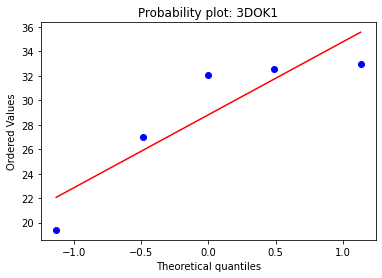

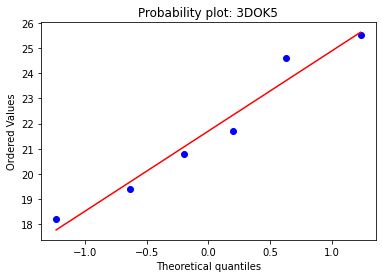

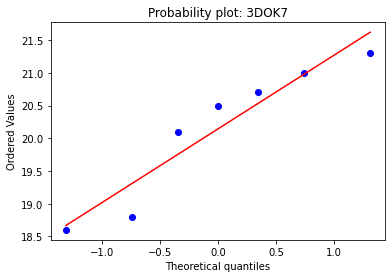

In [300]:
for strain in nit_melt['R_strain'].unique():
    stats.probplot(nit_melt[nit_melt['R_strain'] == strain]['Nit_lev'], dist="norm", plot=plt)
    plt.title(f"Probability plot: {strain}")
    plt.show()

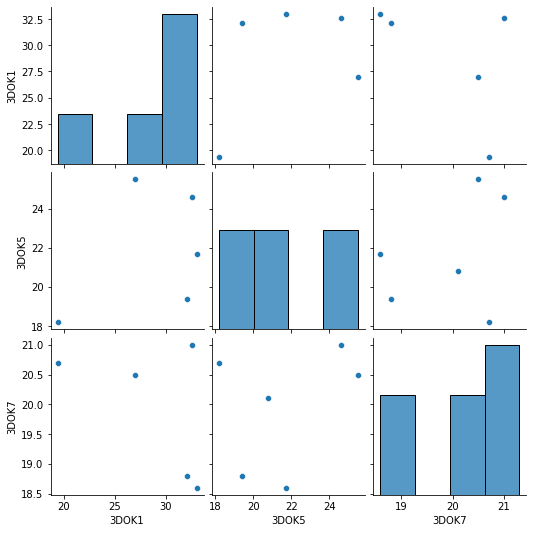

In [325]:
sns.pairplot(nit_df)

<AxesSubplot:>

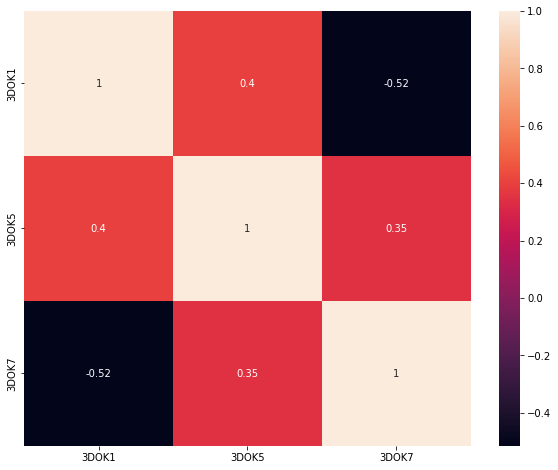

In [324]:
corr = nit_df.corr()

f, ax = plt.subplots(figsize=(10, 8))
# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        annot=True)


#### model generation, and ANOVA creation

In [293]:
# create the model
nit_model = ols('Nit_lev ~ R_strain', data=nit_melt).fit()
nit_anova = sm.stats.anova_lm(nit_model, typ=1)
nit_anova

,df,sum_sq,mean_sq,F,PR(>F)
R_strain,2.0,236.550968,118.275484,9.72313,0.001959
Residual,15.0,182.465143,12.164343,NaN,NaN


In [301]:
print(nit_model.summary())

# Using our F-statistic, there is enough evidence to conclude that not all strains responded the same

                            OLS Regression Results                            
Dep. Variable:                Nit_lev   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     9.723
Date:                Sat, 23 Apr 2022   Prob (F-statistic):            0.00196
Time:                        20:42:27   Log-Likelihood:                -46.387
No. Observations:                  18   AIC:                             98.77
Df Residuals:                      15   BIC:                             101.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            28.8200      1.56

C:\Python310\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


#### ANOVA analysis

In [ ]:
# a. Is there evidence of a difference in the effects of the three treatments on the # mean nitrogen content?
# Analyze the data completely, and draw conclusions based on your analysis. Use a = .01.

alpha = 0.01

In [ ]:
# b. Was there any evidence of a violation in the conditions required to conduct your analysis in part (a)?



### 9.23 - Fat content of shoulder muscles on dogs by drug treatment group
Researchers conducted a study of the effects of three drugs on the fat content of the
shoulder muscles in labrador retrievers. They divided 80 dogs at random into four treatment
groups. The dogs in group A were the untreated controls, while groups B, C, and D received one
of three new heartworm medications in their diets. Five dogs randomly selected from each of the
four groups received treatment for periods varying from 4 months to 2 years. The percentage of
fat content of the shoulder muscles was determined and is given here:

In [283]:
fc_df = pd.read_excel('hw4.xlsx', sheet_name="9.23")
# fc_df

In [333]:
fc_df.corr()

,Examination time,A,B,C,D
Examination time,1.000000,-0.190062,0.806860,0.786613,0.392070
A,-0.190062,1.000000,-0.205575,-0.242040,0.123522
B,0.806860,-0.205575,1.000000,0.454967,0.338287
C,0.786613,-0.242040,0.454967,1.000000,0.431810
D,0.392070,0.123522,0.338287,0.431810,1.000000


#### ANOVA table given in book - also calculated below

In [284]:
fd_melt = pd.melt(fc_df.drop(labels=["Unit"], axis=1), 
                    id_vars=['Examination time'], 
                    value_vars=['A', 'B', 'C', 'D'])
fd_melt.columns = ['ExamTimeMonths', 'TreatmentGroup', 'FatContent']
# fd_melt

In [269]:
model = ols('FatContent ~ C(TreatmentGroup)', data=fd_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(TreatmentGroup),3.0,1.079645,0.359882,3.027044,0.034577
Residual,76.0,9.035550,0.118889,NaN,NaN


In [273]:
print(f"Total df: {anova_table['df'].sum()}")
print(f"Total SS: {round(anova_table['sum_sq'].sum(), 4)}")

Total df: 79.0
Total SS: 10.1152


In [ ]:
# a. Is there a significant difference in the mean percentages of fat content in the four
# treatment groups? Use a = .05.

alpha = 0.05

In [ ]:
# b. Do any of the three treatments for heartworm appear to have increased the
# mean percentage of fat content over the level in the control group?
